In [1]:
import folium
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import box
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from shapely.geometry import Point
from pyproj import Proj, transform, CRS

In [2]:
import matplotlib.font_manager as fm

# 한국어 출력을 위한 폰트 설정
plt.rc('font', family='NanumGothic') 

# 마이너스 기호가 깨지는 것을 방지
plt.rcParams['axes.unicode_minus'] = False

In [3]:
gdf = gpd.read_file("data/(도로명주소)실폭도로_서울/TL_SPRD_RW_11/TL_SPRD_RW_11.shp")

In [4]:
gdf.head()

,OPERT_DE,RW_SN,SIG_CD,geometry
0,None,1,11110,"POLYGON ((954128.662 1952588.029, 954131.186 1..."
1,None,1,11140,"POLYGON ((957576.393 1951002.011, 957565.081 1..."
2,None,1,11170,"POLYGON ((950950.908 1948502.827, 950988.176 1..."
3,None,1,11200,"POLYGON ((957460.524 1949105.582, 957483.937 1..."
4,None,1,11215,"POLYGON ((965324.059 1949777.527, 965348.337 1..."


In [5]:
gdf['OPERT_DE'].value_counts()

OPERT_DE
20091029          500
20110317          339
20080902          306
20080901          253
20070921          229
                 ... 
20210610125709      1
20200501175438      1
20200414163730      1
20130513130238      1
20221103173247      1
Name: count, Length: 5003, dtype: int64

In [6]:
gdf['RW_SN'].value_counts().sort_index()

RW_SN
1          22
2          22
3          22
4          22
5          19
           ..
10929       1
10930       1
10931       1
10932       1
1000000     3
Name: count, Length: 9969, dtype: int64

In [7]:
gdf = gdf[gdf['SIG_CD'] == '11710']

In [8]:
gdf

,OPERT_DE,RW_SN,SIG_CD,geometry
20,None,1,11710,"POLYGON ((964364.922 1948174.237, 964362.772 1..."
42,None,2,11710,"POLYGON ((964354.727 1948164.179, 964352.220 1..."
64,None,3,11710,"POLYGON ((961796.233 1946829.291, 961796.238 1..."
86,None,4,11710,"POLYGON ((961801.841 1946756.315, 961802.078 1..."
105,20231214140016,5,11710,"POLYGON ((966654.517 1948888.738, 966638.774 1..."
...,...,...,...,...
17825,20240214153126,1153,11710,"POLYGON ((969252.328 1943431.255, 969255.163 1..."
17836,20240214153141,1154,11710,"POLYGON ((969038.398 1943312.776, 969022.318 1..."
17847,20240214153201,1155,11710,"POLYGON ((969159.989 1943395.085, 969126.541 1..."
17858,20240214153219,1156,11710,"POLYGON ((969236.955 1943454.844, 969257.984 1..."


<Axes: >

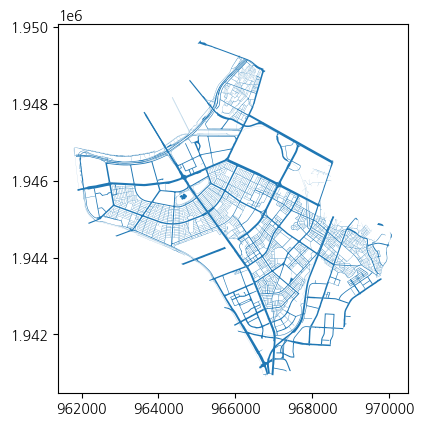

In [9]:
gdf.plot()

In [10]:
# 도로 폴리곤의 면적과 둘레를 계산
gdf['area'] = gdf['geometry'].area
gdf['perimeter'] = gdf['geometry'].length

# 간단한 평균 폭 추정 (예시: 면적을 둘레의 절반으로 나눔)
gdf['approx_width'] = gdf['area'] / (gdf['perimeter'] / 2)

In [11]:
def classify_width_score(row):
    if row['approx_width'] <= 2:
        return 6
    elif row['approx_width'] <= 3:
        return 5
    elif row['approx_width'] <= 3.5:
        return 4
    elif row['approx_width'] <= 4:
        return 3
    elif row['approx_width'] <= 4.5:
        return 2
    elif row['approx_width'] <= 5:
        return 1
    else:
        return None 

# 새로운 열에 점수 저장
gdf['width_score'] = gdf.apply(classify_width_score, axis=1)

In [12]:
gdf

,OPERT_DE,RW_SN,SIG_CD,geometry,area,perimeter,approx_width,width_score
20,None,1,11710,"POLYGON ((964364.922 1948174.237, 964362.772 1...",2.669129,7.849925,0.680039,6.0
42,None,2,11710,"POLYGON ((964354.727 1948164.179, 964352.220 1...",3.375267,9.016179,0.748713,6.0
64,None,3,11710,"POLYGON ((961796.233 1946829.291, 961796.238 1...",0.000989,0.508476,0.003889,6.0
86,None,4,11710,"POLYGON ((961801.841 1946756.315, 961802.078 1...",0.029983,1.103731,0.054329,6.0
105,20231214140016,5,11710,"POLYGON ((966654.517 1948888.738, 966638.774 1...",62794.743709,3886.066310,32.317896,NaN
...,...,...,...,...,...,...,...,...
17825,20240214153126,1153,11710,"POLYGON ((969252.328 1943431.255, 969255.163 1...",106.708376,45.479500,4.692592,1.0
17836,20240214153141,1154,11710,"POLYGON ((969038.398 1943312.776, 969022.318 1...",116.938798,50.996169,4.586180,1.0
17847,20240214153201,1155,11710,"POLYGON ((969159.989 1943395.085, 969126.541 1...",676.926453,237.776990,5.693793,NaN
17858,20240214153219,1156,11710,"POLYGON ((969236.955 1943454.844, 969257.984 1...",686.963718,241.081646,5.699013,NaN


In [13]:
gdf = gdf[gdf['area'] <= 10000]

In [14]:
gdf['area'].value_counts().sort_index()

area
0.000989       1
0.029983       1
0.091743       1
0.234467       1
1.471224       1
              ..
9563.709636    1
9598.524416    1
9691.773237    1
9749.338462    1
9827.409838    1
Name: count, Length: 512, dtype: int64

In [15]:
gdf

,OPERT_DE,RW_SN,SIG_CD,geometry,area,perimeter,approx_width,width_score
20,None,1,11710,"POLYGON ((964364.922 1948174.237, 964362.772 1...",2.669129,7.849925,0.680039,6.0
42,None,2,11710,"POLYGON ((964354.727 1948164.179, 964352.220 1...",3.375267,9.016179,0.748713,6.0
64,None,3,11710,"POLYGON ((961796.233 1946829.291, 961796.238 1...",0.000989,0.508476,0.003889,6.0
86,None,4,11710,"POLYGON ((961801.841 1946756.315, 961802.078 1...",0.029983,1.103731,0.054329,6.0
126,None,6,11710,"POLYGON ((962043.707 1945766.962, 962043.107 1...",5089.990437,374.898903,27.153936,NaN
...,...,...,...,...,...,...,...,...
17825,20240214153126,1153,11710,"POLYGON ((969252.328 1943431.255, 969255.163 1...",106.708376,45.479500,4.692592,1.0
17836,20240214153141,1154,11710,"POLYGON ((969038.398 1943312.776, 969022.318 1...",116.938798,50.996169,4.586180,1.0
17847,20240214153201,1155,11710,"POLYGON ((969159.989 1943395.085, 969126.541 1...",676.926453,237.776990,5.693793,NaN
17858,20240214153219,1156,11710,"POLYGON ((969236.955 1943454.844, 969257.984 1...",686.963718,241.081646,5.699013,NaN


In [22]:
# 'width_score' 열에서 결측치가 있는 모든 행 제거
gdf = gdf.dropna(subset=['width_score'])

In [23]:
gdf = gdf.drop(columns=['OPERT_DE', 'RW_SN', 'area', 'perimeter'])

KeyError: "['OPERT_DE', 'RW_SN', 'area', 'perimeter'] not found in axis"

In [24]:
gdf

,SIG_CD,geometry,approx_width,width_score,lon,lat
20,11710,"POLYGON ((127.09667 37.53219, 127.09665 37.532...",0.680039,6.0,127.096656,37.532186
42,11710,"POLYGON ((127.09656 37.53210, 127.09653 37.532...",0.748713,6.0,127.096539,37.532094
64,11710,"POLYGON ((127.06767 37.51997, 127.06767 37.519...",0.003889,6.0,127.067668,37.519966
86,11710,"POLYGON ((127.06774 37.51931, 127.06774 37.519...",0.054329,6.0,127.067736,37.519307
192,11710,"POLYGON ((127.15692 37.49057, 127.15710 37.490...",4.086216,2.0,127.157358,37.490435
...,...,...,...,...,...,...
17793,11710,"POLYGON ((127.15162 37.49215, 127.15182 37.491...",2.800006,5.0,127.151702,37.492033
17803,11710,"POLYGON ((127.15188 37.49185, 127.15208 37.491...",2.795413,5.0,127.151968,37.491725
17814,11710,"POLYGON ((127.15240 37.49125, 127.15237 37.491...",2.810047,5.0,127.152243,37.491406
17825,11710,"POLYGON ((127.15219 37.48962, 127.15222 37.489...",4.692592,1.0,127.152175,37.489542


In [25]:
gdf = gdf.to_crs(epsg=4326)

In [26]:
gdf['lon'] = gdf.geometry.centroid.x
gdf['lat'] = gdf.geometry.centroid.y

C:\Users\1qlqj\AppData\Local\Temp\ipykernel_27276\3730381962.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['lon'] = gdf.geometry.centroid.x
C:\Users\1qlqj\AppData\Local\Temp\ipykernel_27276\3730381962.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['lat'] = gdf.geometry.centroid.y


In [27]:
# 지도 생성 (하얀색 바탕)
m = folium.Map(location=[37.5642135, 127.0016985], zoom_start=12, tiles='CartoDB positron')

# 점수에 따른 색상 매핑
color_map = {
    1: 'red',
    2: 'orange',
    3: 'yellow',
    4: 'green',
    5: 'blue',
    6: 'purple'
}

# 도로 폭 점수에 따라 각 도로 구간 시각화
for _, row in gdf.iterrows():
    # GeoSeries로 변환
    sim_geo = gpd.GeoSeries(row['geometry'])
    # GeoJSON으로 변환
    geo_j = sim_geo.to_json()
    # 색상 결정
    color = color_map.get(row['width_score'], 'gray')  # 점수에 해당하는 색상을 가져오거나, 기본값으로 'gray' 설정
    
    # GeoJson 객체 생성 및 지도에 추가
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x, color=color: {'color': color, 'weight': 3})
    geo_j.add_to(m)

# 지도 표시
m

In [29]:
gdf = gdf.drop(columns = ['SIG_CD', 'lon', 'lat'])

In [30]:
gdf

,geometry,approx_width,width_score
20,"POLYGON ((127.09667 37.53219, 127.09665 37.532...",0.680039,6.0
42,"POLYGON ((127.09656 37.53210, 127.09653 37.532...",0.748713,6.0
64,"POLYGON ((127.06767 37.51997, 127.06767 37.519...",0.003889,6.0
86,"POLYGON ((127.06774 37.51931, 127.06774 37.519...",0.054329,6.0
192,"POLYGON ((127.15692 37.49057, 127.15710 37.490...",4.086216,2.0
...,...,...,...
17793,"POLYGON ((127.15162 37.49215, 127.15182 37.491...",2.800006,5.0
17803,"POLYGON ((127.15188 37.49185, 127.15208 37.491...",2.795413,5.0
17814,"POLYGON ((127.15240 37.49125, 127.15237 37.491...",2.810047,5.0
17825,"POLYGON ((127.15219 37.48962, 127.15222 37.489...",4.692592,1.0


In [31]:
gdf.to_csv("data/도로폭_점수.csv")